# Image Classification using Keras on teh MNIST database
I will be showing my experimenation woth Keras usgn Tensorflow backend

## Importing Secton

In [10]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [11]:
np.random.seed(1671)   # for reproducibility

##  Network and Training Parameter

In [12]:
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10  # number of outputs = number of digits
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2  # how much TRAIN is reserved for VALIDATION

## Loading and Assigning data

Default size of the images: (60000, 28, 28)
Variable   Type       Data/Info
-------------------------------
X_test     ndarray    10000x28x28: 7840000 elems, type `uint8`, 7840000 bytes (7.476806640625 Mb)
X_train    ndarray    60000x28x28: 47040000 elems, type `uint8`, 47040000 bytes (44.86083984375 Mb)
Y_test     ndarray    10000x10: 100000 elems, type `float64`, 800000 bytes (781.25 kb)
Y_train    ndarray    60000x10: 600000 elems, type `float64`, 4800000 bytes (4.57763671875 Mb)
mosaic     ndarray    902x902: 813604 elems, type `float64`, 6508832 bytes (6.207305908203125 Mb)
y_test     ndarray    10000: 10000 elems, type `uint8`, 10000 bytes
y_train    ndarray    60000: 60000 elems, type `uint8`, 60000 bytes


The training image represent an number:  5 




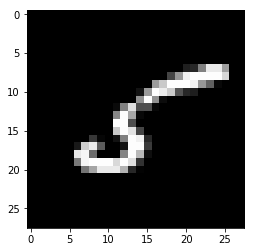

In [23]:
#data: Shuffled and plit between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Default size of the images:', X_train.shape)
# Provide information about the ndarray variables in this case X_train, y_train,X_test, and y_test
%whos ndarray
# Plot a random image from the training set
RandomIndex = np.random.randint(0,(X_train.shape)[1])

print('\n\nThe training image represent an number: ',y_train[RandomIndex],'\n\n')
plt.imshow(X_train[RandomIndex],cmap='gray')

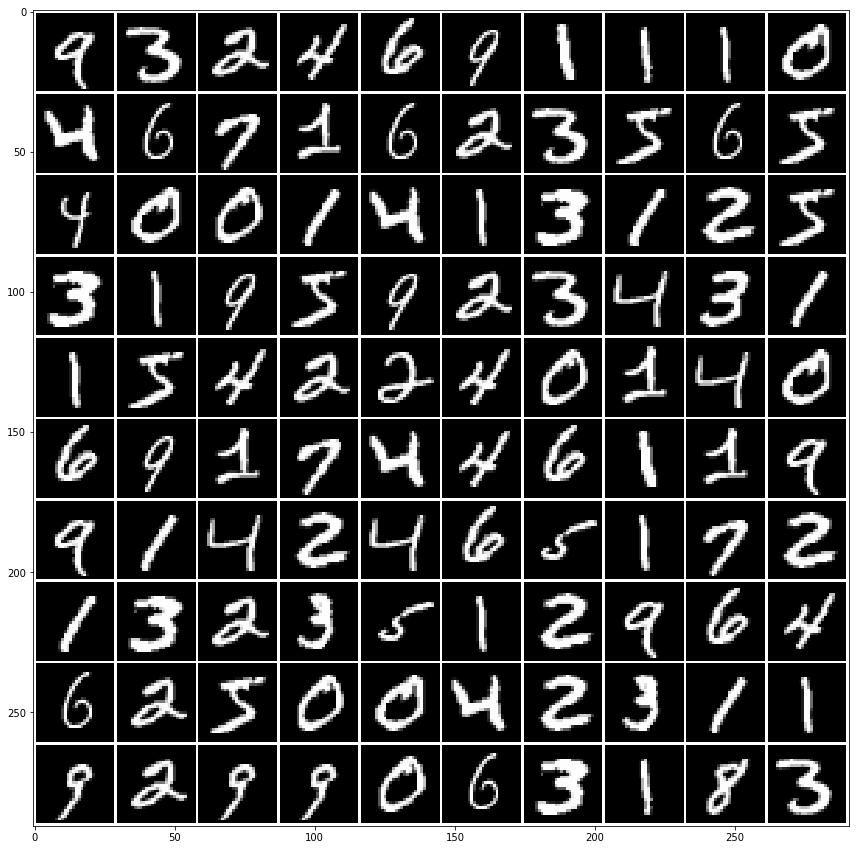

In [35]:
Nimages = 10
Mimages = 10
NImgSize = 28
MImgSize = 28
thick = 1
MaxNumImages = (X_train.shape)[1]
mosaic = np.ones([Nimages*NImgSize+thick*(Nimages+1), Mimages*NImgSize+thick*(Mimages+1)])*255
for i in range(0,Nimages):
    for j in range(0,Mimages):
        RandomIndex = np.random.randint(0,MaxNumImages)
        mosaic[i*(NImgSize+thick)+thick:i*(NImgSize+thick)+NImgSize+thick,j*(MImgSize+thick)+thick:j*(MImgSize+thick)+MImgSize+thick] = X_train[RandomIndex]

plt.figure(figsize=(15,15))
plt.imshow(mosaic, cmap = 'gray')

In [15]:
#X_train is 6000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000,RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
%whos ndarray

Variable   Type       Data/Info
-------------------------------
X_test     ndarray    10000x784: 7840000 elems, type `float32`, 31360000 bytes (29.9072265625 Mb)
X_train    ndarray    60000x784: 47040000 elems, type `float32`, 188160000 bytes (179.443359375 Mb)
mosaic     ndarray    840x840: 705600 elems, type `float64`, 5644800 bytes (5.38330078125 Mb)
y_test     ndarray    10000: 10000 elems, type `uint8`, 10000 bytes
y_train    ndarray    60000: 60000 elems, type `uint8`, 60000 bytes


In [16]:
# normalize
#
X_train /= 255
X_test /= 255

In [17]:
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train,NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


## Design of the Model

In [18]:
# 10 outputs
#final statge is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Compilation of the Model

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=1, 
                    validation_split = VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s 52us/step - loss: 1.4191 - acc: 0.6543 - val_loss: 0.7057 - val_acc: 0.8467
Epoch 2/200
48000/48000 [==============================] - 2s 34us/step - loss: 0.5715 - acc: 0.8602 - val_loss: 0.4448 - val_acc: 0.8846
Epoch 3/200
48000/48000 [==============================] - 2s 31us/step - loss: 0.4291 - acc: 0.8840 - val_loss: 0.3736 - val_acc: 0.8952
Epoch 4/200
48000/48000 [==============================] - 2s 32us/step - loss: 0.3746 - acc: 0.8956 - val_loss: 0.3364 - val_acc: 0.9037
Epoch 5/200
48000/48000 [==============================] - 2s 36us/step - loss: 0.3436 - acc: 0.9030 - val_loss: 0.3133 - val_acc: 0.9114
Epoch 6/200
48000/48000 [==============================] - 2s 34us/step - loss: 0.3219 - acc: 0.9081 - val_loss: 0.2988 - val_acc: 0.9155
Epoch 7/200
48000/48000 [==============================] - 2s 32us/step - loss: 0.3050 - acc: 0.9136 - val_loss: 0.2839 - 

## Evaluation of the Model

In [20]:
score = model.evaluate(X_test,Y_test, verbose = VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 32us/step
Test score: 0.0850459265099
Test accuracy: 0.9752
